In [1]:
#Import several helpfull libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
from datetime import datetime

%matplotlib inline

#PATH to the training data
data = pd.read_csv('data/train.csv')  # Makes Pandas objects
test = pd.read_csv('data/test.csv')


In [2]:
# Let's take a look at our dataset:
print(data.shape)
print(data.head())

print(data.columns)

(10886, 12)
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [3]:
print(test.shape)
print(test.head())

(6493, 9)
              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014  


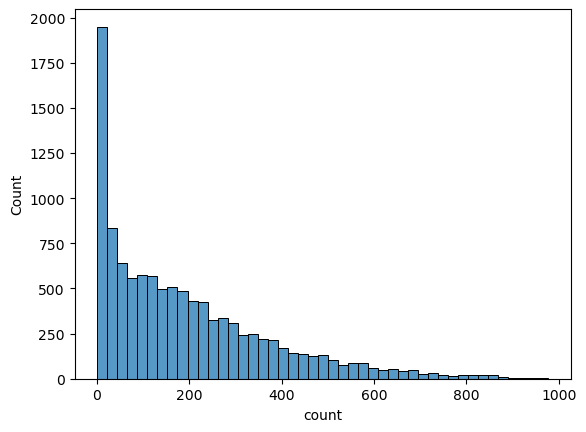

In [4]:
#histogram

sns.histplot(data['count']);



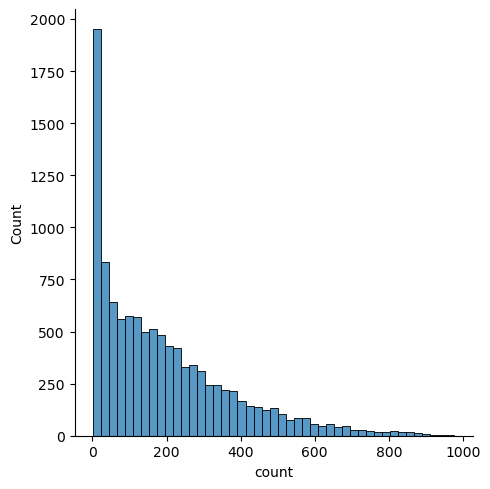

In [5]:
sns.displot(data['count']);

In [6]:
data  = data.drop(["casual"],axis=1)
data  = data.drop(["registered"],axis=1)


In [7]:
 #checks if there is NAN values
a_data = data.copy()
NAN = [(var, a_data[var].isna().mean()*100) for var in a_data]
NAN




[('datetime', 0.0),
 ('season', 0.0),
 ('holiday', 0.0),
 ('workingday', 0.0),
 ('weather', 0.0),
 ('temp', 0.0),
 ('atemp', 0.0),
 ('humidity', 0.0),
 ('windspeed', 0.0),
 ('count', 0.0)]

In [8]:
 #checks if there is NAN values
a_test = test.copy()
NAN = [(var, a_test[var].isna().mean()*100) for var in a_test]
NAN


[('datetime', 0.0),
 ('season', 0.0),
 ('holiday', 0.0),
 ('workingday', 0.0),
 ('weather', 0.0),
 ('temp', 0.0),
 ('atemp', 0.0),
 ('humidity', 0.0),
 ('windspeed', 0.0)]

C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


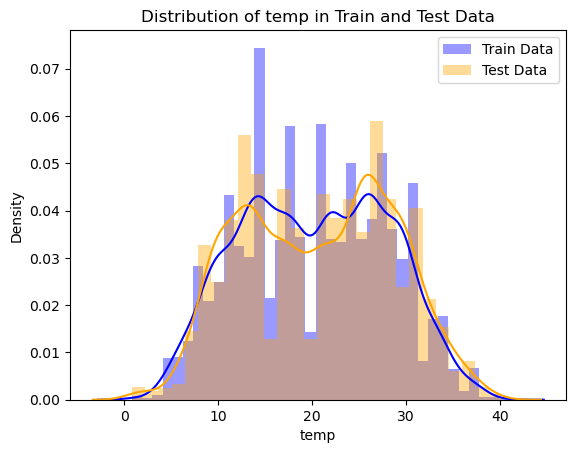

In [9]:
# Is there a 'bad' selection of training/test data?
var='temp'
# Plotting the distribution for the 'data' DataFrame in blue
sns.distplot(data[var], color='blue', label='Train Data')

# Plotting the distribution for the 'test' DataFrame in orange
sns.distplot(test[var], color='orange', label='Test Data')


# Adding labels and legend
plt.xlabel(var)
plt.ylabel('Density')
plt.title(f'Distribution of {var} in Train and Test Data')
plt.legend()

# Show the plot
plt.show()

In [10]:
#data["date"] = data.datetime.apply(lambda x : x.split()[0])
#data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0])
#data["weekday"] = data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
#data["month"] = data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

data["hour"] = [t.hour for t in pd.DatetimeIndex(data.datetime)]
data["day"] = [t.dayofweek for t in pd.DatetimeIndex(data.datetime)]
data["month"] = [t.month for t in pd.DatetimeIndex(data.datetime)]
data['year'] = [t.year for t in pd.DatetimeIndex(data.datetime)]
# data['year'] = data['year'].map({2011:0, 2012:1})

data  = data.drop(["datetime"],axis=1)


data.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,2011


In [11]:
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
# test['year'] = test['year'].map({2011:0, 2012:1})
datetime =test["datetime"]
test  = test.drop(["datetime"],axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,2011
2,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,2011
3,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,2011
4,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,2011


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.006546,-0.010553,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,-0.000354,-0.191832,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,0.002780,-0.704267,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.022740,-0.047692,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.145430,-0.038466,0.257589,0.061226


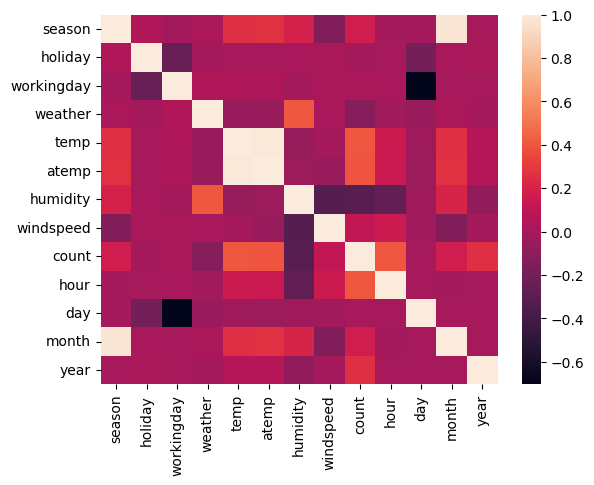

In [12]:

# correlation matrix
CORmatrix = data.corr(method='pearson')
f, ax = plt.subplots()
sns.heatmap(CORmatrix)
CORmatrix.head()

Index(['count', 'hour', 'temp', 'atemp', 'year'], dtype='object')


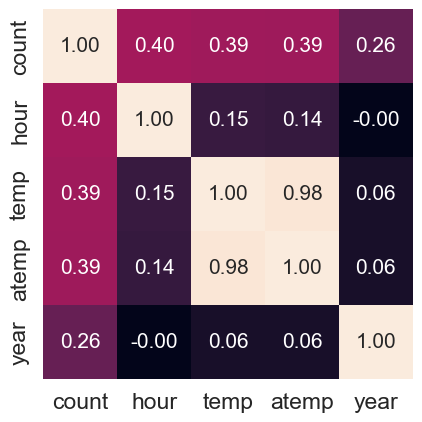

In [13]:
#Small correlation matrix
k = 5 #number of variables for heatmap
cols = CORmatrix.nlargest(k, 'count')['count'].index   # nlargest : pick the k highest correlation scores
print(cols)
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
corr_pairs = CORmatrix.unstack()
sorted_pairs = corr_pairs.sort_values()
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.4  ]
strong_pairs_2 = strong_pairs[abs(strong_pairs) < 1.0  ]

print(strong_pairs_2)

workingday  day          -0.704267
day         workingday   -0.704267
hour        count         0.400601
count       hour          0.400601
humidity    weather       0.406244
weather     humidity      0.406244
month       season        0.971524
season      month         0.971524
temp        atemp         0.984948
atemp       temp          0.984948
dtype: float64


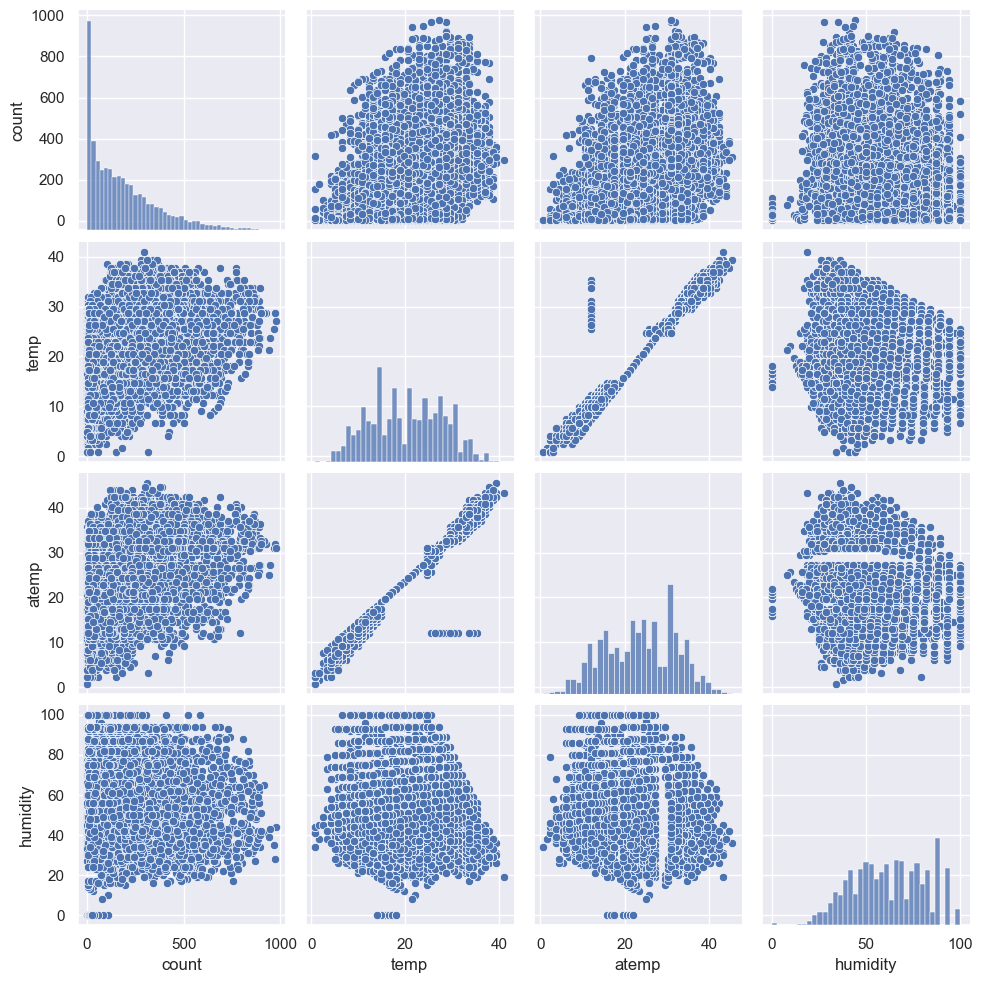

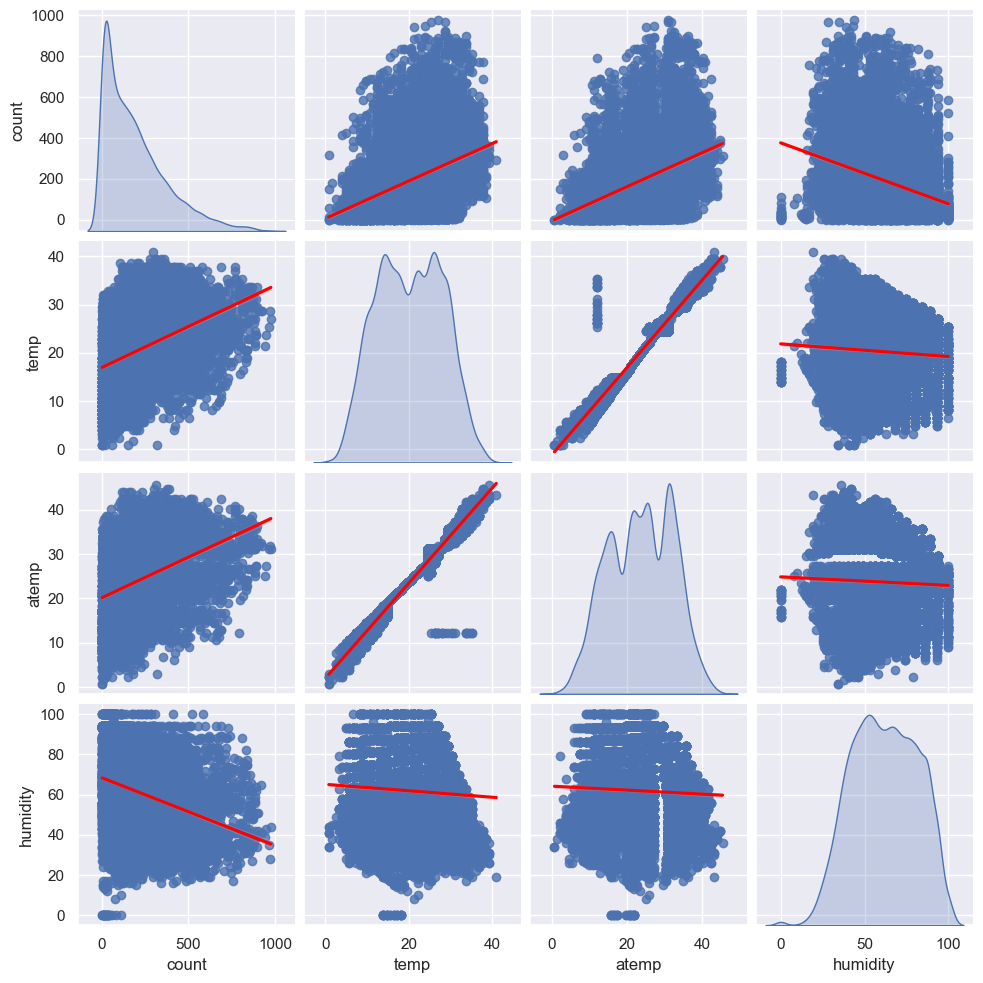

In [15]:
#Lets investigate how the sales price 'scales' with the following well correlated features
sns.set() 
cols = ['count',  'temp', 'atemp', 'humidity']
sns.pairplot(data[cols],height=2.5)
sns.pairplot(data[cols], kind='reg', diag_kind='kde',
            plot_kws={'line_kws':{'color':'red'}})
plt.show();

C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


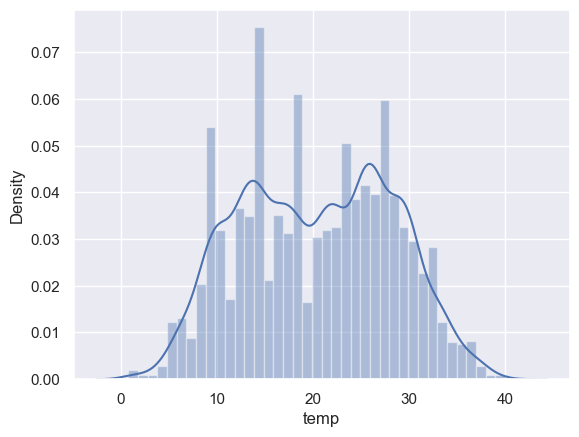

In [16]:
#Creating a copy of the train and test datasets
c_data  = data.copy()
c_test  = test.copy()
#Concatenate training and test data:
c_data['train']  = 1
c_test['train']  = 0
a_data = pd.concat([c_data, c_test], axis=0,sort=False)

var='temp'
sns.distplot(a_data[var]);

# Build Regression Model

In [17]:
#Import Libraries for example:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
# try different models (Lasso, Ridge, Elasticnet,) and see if they improve your prediction:

In [18]:
# ntrain = a_data.shape[0]
# X_train=data[:ntrain]
# y_train=data['SalePrice']
train_data = a_data[a_data['train'] == 1].copy()
train_Y = train_data['count']
#print( train_Y)
train_X= train_data.drop(['count'],axis=1)
#print(train_X)

test_X = a_data[a_data['train'] == 0].copy()
test_X =test_X.drop(['count'],axis=1)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(train_X, train_Y)

RandomForestRegressor(random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

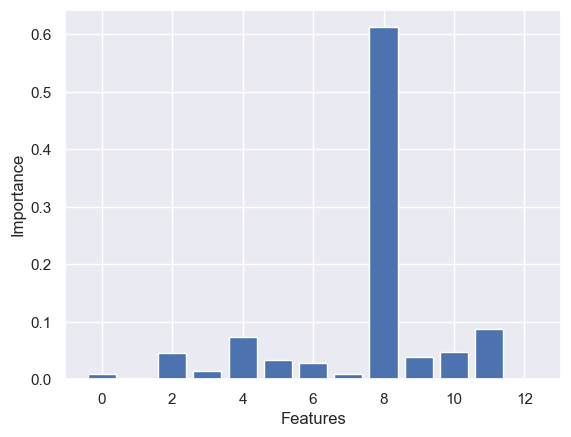

In [20]:
plt.bar(range(train_X.shape[1]), clf.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

In [41]:
X= train_X
y= train_Y

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
X.columns



Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour', 'day', 'month', 'year', 'train'],
      dtype='object')

RandomForest R-squared for 2 : 0.8960126474274048
RandomForest R-squared for 3 : 0.9119870012194999
RandomForest R-squared for 4 : 0.9437765028712548
RandomForest R-squared for 5 : 0.9479101397802436
RandomForest R-squared for 6 : 0.9579123909661355
RandomForest R-squared for 7 : 0.9576123030854453
RandomForest R-squared for 8 : 0.9571588535176274
RandomForest R-squared for 9 : 0.9616256682963583
RandomForest R-squared for 10 : 0.9616612017920931
RandomForest R-squared for 11 : 0.9615135243119528
RandomForest R-squared for 12 : 0.961465011400606


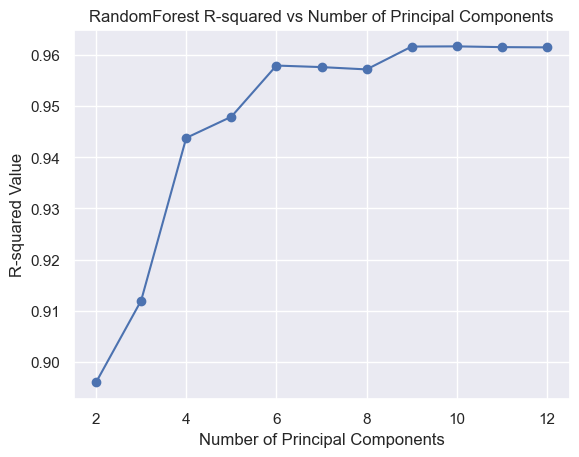

In [47]:
from sklearn.decomposition import PCA
nList=[2,3,4,5,6,7,8,9,10,11,12]
scores= []
explainedVariances= []
cumulativeExplainedVariance=[]
for i in nList:
    pca = PCA(n_components=i)
    pca.fit(train_X)
    pca_dataset = pca.transform(train_X)
#     explained_variance = pca.explained_variance_ratio_
#     explainedVariances.append(explained_variance)
#     cumulative_explained_variance = explained_variance.cumsum()
#     cumulativeExplainedVariance.append(cumulative_explained_variance)
#     plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o')
#     plt.xlabel('Number of Principal Components')
#     plt.ylabel('Cumulative Explained Variance')
#     plt.show()
    X2 =pca_dataset
    Y2 =train_Y
    Xtrain, Xtest, ytrain, ytest = train_test_split(X2, Y2, test_size=0.2, random_state=42)
    random2 =  RandomForestRegressor()
    modelrandom2 = random2.fit(Xtrain,ytrain)
    print('RandomForest R-squared for', i, ':', modelrandom2.score(Xtrain, ytrain))
    scores.append(modelrandom2.score(Xtrain, ytrain))

# print(explainedVariances)
# print()
# print(cumulativeExplainedVariance)
components = range(2, 13)

plt.plot(components, scores, marker='o')
plt.title('RandomForest R-squared vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('R-squared Value')
plt.grid(True)
plt.show()

RandomForest R-squared for 2 : 0.8962995778793326
RandomForest R-squared for 3 : 0.9120917743383471
RandomForest R-squared for 4 : 0.9434852953456324
RandomForest R-squared for 5 : 0.9481805338754253
RandomForest R-squared for 6 : 0.957116640479353
RandomForest R-squared for 7 : 0.9582109975322934
RandomForest R-squared for 8 : 0.9581573765105306
RandomForest R-squared for 9 : 0.9622126810134892
RandomForest R-squared for 10 : 0.963037050539802
RandomForest R-squared for 11 : 0.9621413675436604
RandomForest R-squared for 12 : 0.9618435193002546

In [44]:


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
random2 =  RandomForestRegressor()
modelrandom2 = random2.fit(Xtrain,ytrain)
print('RandomForest R-squared for',  ':', modelrandom2.score(Xtrain, ytrain))


RandomForest R-squared for : 0.9925979655595598


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)
imp_list=rf.feature_importances_
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 


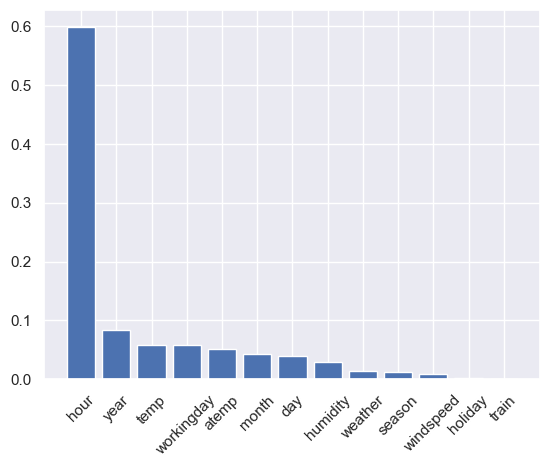

In [23]:
import operator
sorted_x = sorted(feats.items(), key=operator.itemgetter(1),reverse=True)
graph_features = []
graph_importance = []
for i in sorted_x:
    graph_features.append(i[0])
    graph_importance.append(i[1])
    
plt.bar(graph_features,graph_importance)
plt.xticks(rotation=45)
plt.show()

C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


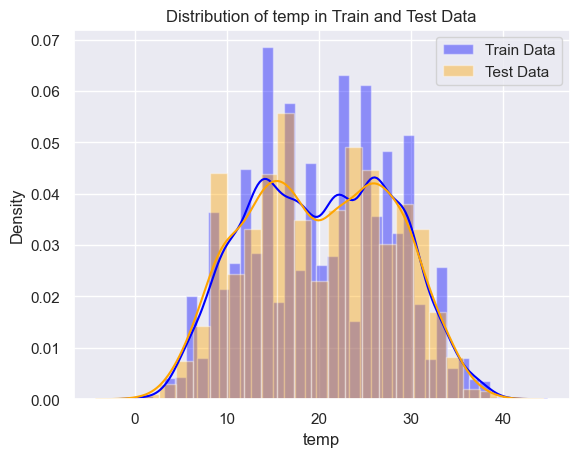

In [24]:
# Is there a 'bad' selection of training/test data?
var='temp'
# Plotting the distribution for the 'data' DataFrame in blue
sns.distplot(X_train[var], color='blue', label='Train Data')

# Plotting the distribution for the 'test' DataFrame in orange
sns.distplot(X_validation[var], color='orange', label='Test Data')


# Adding labels and legend
plt.xlabel(var)
plt.ylabel('Density')
plt.title(f'Distribution of {var} in Train and Test Data')
plt.legend()

# Show the plot
plt.show()

# Train model on training data

R-squared: 0.38922505622050396
linear R-squared: 0.3875452733592719
Mean Squared Error: 19952.578180183253


C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


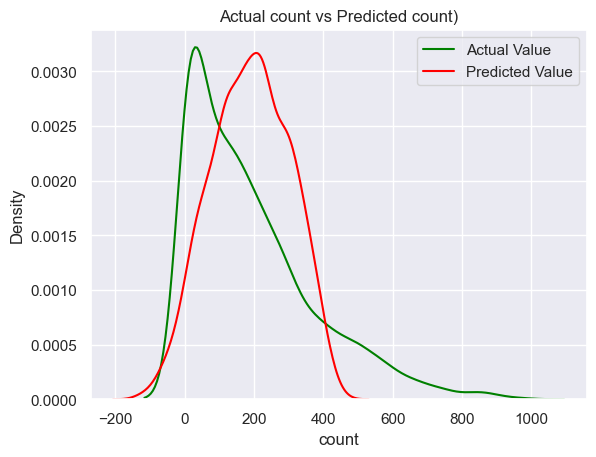

In [25]:
lr = LinearRegression()

model = lr.fit(train_X, train_Y)

print('R-squared:', model.score(train_X, train_Y))
lr2 = LinearRegression()
lr2model= lr2.fit(X_train,y_train)
print('linear R-squared:', lr2model.score(X_train, y_train))

predictions = lr2model.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print('Mean Squared Error:', mse)
plt.title("Actual count vs Predicted count)")
ax1 = sns.distplot(y_validation,hist=False,color="green",label="Actual Value")
sns.distplot(predictions,hist=False,color='red',label="Fitted Value",ax = ax1)
plt.legend( loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [26]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

## LASSO
# # Initialize Lasso model
lasso = Lasso(alpha=0.1)

# # Fit the model to the training data
modelLasso = lasso.fit(train_X, train_Y)
print('Lasso R-squared:', modelLasso.score(train_X, train_Y))



lasso2 = Lasso(alpha=0.1)
lasso2Model = lasso2.fit(X_train,y_train)
print('lasso R-squared:', lasso2Model.score(X_train, y_train))

predictions = lasso2Model.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print('Mean Squared Error:', mse)

# # Predict the target variable for test data
# y_pred = lasso.predict(test_X)

## RIDGE
# # Initialize Ridge model
ridge = Ridge(alpha=0.5)

# # Fit the model to the training data
modelRidge = ridge.fit(train_X, train_Y)
print('Ridge R-squared:', modelRidge.score(train_X, train_Y))




ridge2 = Ridge(alpha=0.5)
ridge2Model = ridge2.fit(X_train,y_train)
print('ridge2 R-squared:', ridge2Model.score(X_train, y_train))

predictions = ridge2Model.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print('Mean Squared Error:', mse)

# # Predict the target variable for test data
#y_pred = ridge.predict(test_X)


# ELASTICNET
# Initialize ElasticNet model
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model to the training data
modelElastic = elasticnet.fit(train_X, train_Y)

print('Elastic R-squared:', modelElastic.score(train_X, train_Y))

elasticnet2 = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet2Model = elasticnet2.fit(X_train,y_train)
print('elastic2 R-squared:', elasticnet2Model.score(X_train, y_train))

predictions = elasticnet2Model.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print('Mean Squared Error:', mse)
mae=mean_absolute_error(y_validation, predictions)
print('Mean Absolute Error:', mae)
medae=median_absolute_error(y_validation, predictions)
print('Median Absolute Error:', medae)

# # Predict the target variable for test data
# y_pred = elasticnet.predict(test_X)



Lasso R-squared: 0.38921068092976874
lasso R-squared: 0.38752572813292196
Mean Squared Error: 19948.441379014715
Ridge R-squared: 0.38922505430936927
ridge2 R-squared: 0.3875452702731844
Mean Squared Error: 19952.565802147732
Elastic R-squared: 0.38765325441649734
elastic2 R-squared: 0.3859598300472836
Mean Squared Error: 19999.925236361007
Mean Absolute Error: 104.78927196692423
Median Absolute Error: 82.31766176378005


tree-squared: 0.9999960271343495
Mean Squared Error: 0.12706611570247933
tree-squared: 0.9999969661789679
Mean Squared Error: 3816.9949494949497


C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


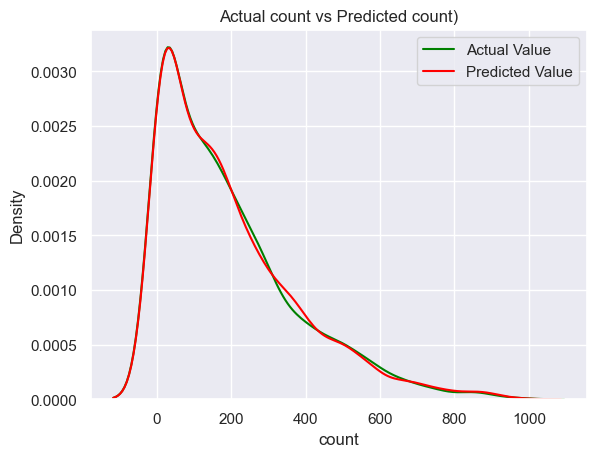

In [27]:
X= train_X
y= train_Y

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
# Decision tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
modelTree = tree.fit(train_X, train_Y)
print('tree-squared:', modelTree.score(train_X, train_Y))

predictions = modelTree.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print('Mean Squared Error:', mse)

tree2 = DecisionTreeRegressor()
modelTree2 = tree2.fit(X_train,y_train)
print('tree-squared:', modelTree2.score(X_train, y_train))

predictions = modelTree2.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print('Mean Squared Error:', mse)

plt.title("Actual count vs Predicted count)")
ax1 = sns.distplot(y_validation,hist=False,color="green",label="Actual Value")
sns.distplot(predictions,hist=False,color='red',label="Fitted Value",ax = ax1)
plt.legend( loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [28]:
test["datetime"] =datetime

Random Forest: 0.9931132376383367
model RandomForest R-squared: 0.9928046043034029
Mean Squared Error: 1529.635177394118


C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


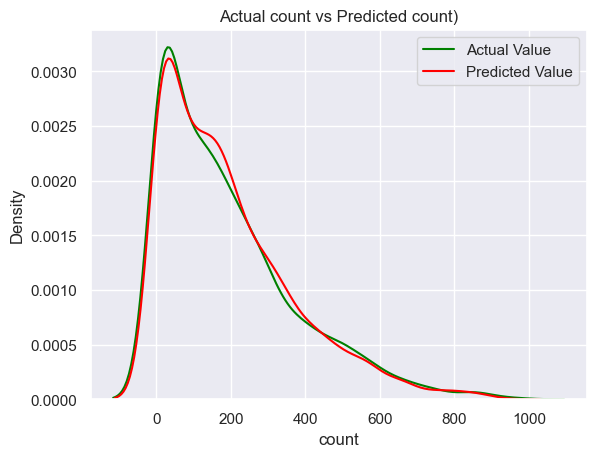

In [29]:
from sklearn.ensemble import RandomForestRegressor
random =  RandomForestRegressor()
modelRandom = random.fit(train_X, train_Y)
print('Random Forest:', modelRandom.score(train_X, train_Y))

random2 =  RandomForestRegressor()
modelrandom2 = random2.fit(X_train,y_train)
print('model RandomForest R-squared:', modelrandom2.score(X_train, y_train))

predictions = modelrandom2.predict(X_validation)
mse = mean_squared_error(y_validation, predictions)
print('Mean Squared Error:', mse)


plt.title("Actual count vs Predicted count)")
ax1 = sns.distplot(y_validation,hist=False,color="green",label="Actual Value")
sns.distplot(predictions,hist=False,color='red',label="Fitted Value",ax = ax1)
plt.legend( loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

linear R-squared: 0.3875452733592719
Mean Squared Error: 19952.578180183253
Mean Absolute Error: 105.31157805207755
Median Absolute Error: 82.31628130264289
tree-squared: 0.9999969661789679
Mean Squared Error: 3406.4765840220384
Mean Absolute Error: 33.34618916437098
Median Absolute Error: 18.0
model RandomForest R-squared: 0.9929941187732203
Mean Squared Error: 1513.9790802740151
Mean Absolute Error: 24.320041857973678
Median Absolute Error: 15.189999999999998


C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

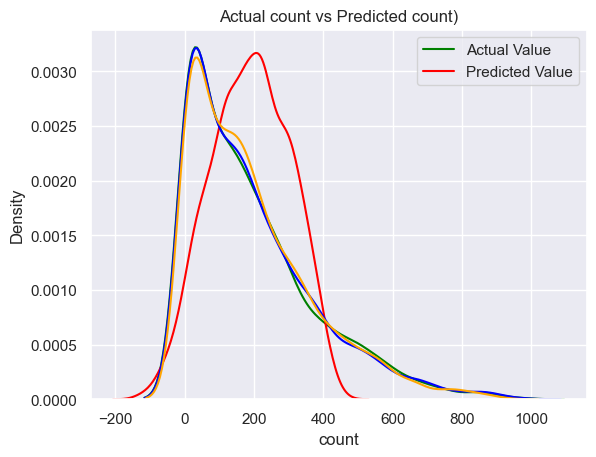

In [30]:
lr2 = LinearRegression()
lr2model= lr2.fit(X_train,y_train)
print('linear R-squared:', lr2model.score(X_train, y_train))

predictions1 = lr2model.predict(X_validation)
mse = mean_squared_error(y_validation, predictions1)
print('Mean Squared Error:', mse)
mae=mean_absolute_error(y_validation, predictions1)
print('Mean Absolute Error:', mae)
medae=median_absolute_error(y_validation, predictions1)
print('Median Absolute Error:', medae)




tree2 = DecisionTreeRegressor()
modelTree2 = tree2.fit(X_train,y_train)
print('tree-squared:', modelTree2.score(X_train, y_train))

predictions2 = modelTree2.predict(X_validation)
mse = mean_squared_error(y_validation, predictions2)
print('Mean Squared Error:', mse)
mae=mean_absolute_error(y_validation, predictions2)
print('Mean Absolute Error:', mae)
medae=median_absolute_error(y_validation, predictions2)
print('Median Absolute Error:', medae)




random2 =  RandomForestRegressor()
modelrandom2 = random2.fit(X_train,y_train)
print('model RandomForest R-squared:', modelrandom2.score(X_train, y_train))

predictions3 = modelrandom2.predict(X_validation)
mse = mean_squared_error(y_validation, predictions3)
print('Mean Squared Error:', mse)
mae=mean_absolute_error(y_validation, predictions3)
print('Mean Absolute Error:', mae)
medae=median_absolute_error(y_validation, predictions3)
print('Median Absolute Error:', medae)


plt.title("Actual count vs Predicted count)")
ax1 = sns.distplot(y_validation,hist=False,color="green",label="Actual Value")
sns.distplot(predictions1,hist=False,color='red',label="Linear Prediction",ax = ax1)
sns.distplot(predictions2,hist=False,color='blue',label="Decision Tree Prediction",ax = ax1)
sns.distplot(predictions3,hist=False,color='orange',label="Random Forest Prediction",ax = ax1)

plt.legend( loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

model XGBOOST R-squared: 0.9831561650937302


C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\onurd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


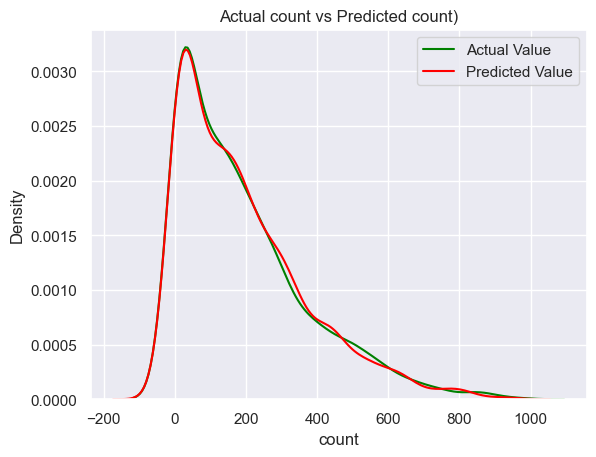

In [31]:
import xgboost as xg
xgr=xg.XGBRegressor()
xgr.fit(X_train,y_train)

print('model XGBOOST R-squared:', xgr.score(X_train, y_train))

y_pred = xgr.predict(X_validation)


plt.title("Actual count vs Predicted count)")
ax1 = sns.distplot(y_validation,hist=False,color="green",label="Actual Value")
sns.distplot(y_pred,hist=False,color='red',label="Fitted Value",ax = ax1)
plt.legend( loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()


In [32]:
y_pred = xgr.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print('Mean Squared Error:', mse)
mae=mean_absolute_error(y_validation, y_pred)
print('Mean Absolute Error:', mae)
medae=median_absolute_error(y_validation, y_pred)
print('Median Absolute Error:', medae)


Mean Squared Error: 1521.319796081697
Mean Absolute Error: 25.002725122730812
Median Absolute Error: 14.13348388671875


In [33]:
# y_pred = lr2model.predict(test_X)
# lenn=len(y_pred)
# for i in range(lenn):
#     if(y_pred[i]<0):
#         y_pred[i]=0;
  #submission score        1.33958
# y_pred = modelrandom2.predict(test_X)
#submission score 0.46938

# y_pred = xgr.predict(test_X)
# lenn=len(y_pred)
# for i in range(lenn):
#     if(y_pred[i]<0):
#         y_pred[i]=0;    
#submission error because of negatives 0.64081

# y_pred = modelTree2.predict(test_X)
#submission score 0.54971


# print(datetime)
submission = pd.DataFrame({"datetime": datetime,"count": y_pred})

submission.to_csv('submission.csv', index=False)
import os
print(os.getcwd())

C:\Users\onurd\Desktop\CmpE481\term_project
